In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import os


# Description du projet

Capteur d'humidité du sol

In [13]:
os.system('scp pi@192.168.1.204:/home/pi/E2_watering/report/soil_moisture.csv  /home/iomys/Programmation/E2_watering/report/soil_moisture.csv')

0

In [14]:
df = pd.read_csv('soil_moisture.csv', parse_dates=True,index_col='timestamp',sep='\s*,\s*',engine='python')


In [15]:
df2 = df[df['cap1']<=1024]
df2 = df2[df2['cap2']<=1024]
df2 = df2[df2['chinois']<=1024]
#df2["2021-05-12":"2021-05-18"]

<AxesSubplot:xlabel='timestamp'>

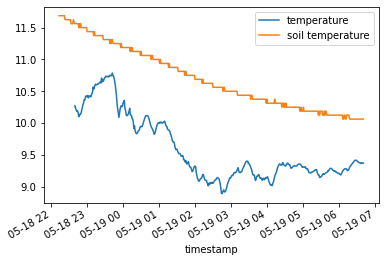

In [16]:
df2[df2.index >"2021-05-18 18:00"][["temperature", "soil temperature"]].plot()

df2

<AxesSubplot:xlabel='timestamp'>

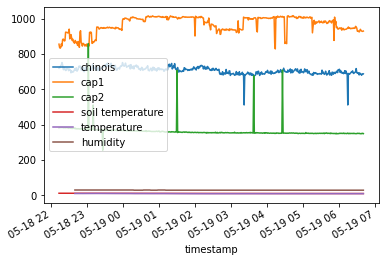

In [18]:
df2[df2.index >"2021-05-18 18:00"].plot()

<AxesSubplot:xlabel='timestamp'>

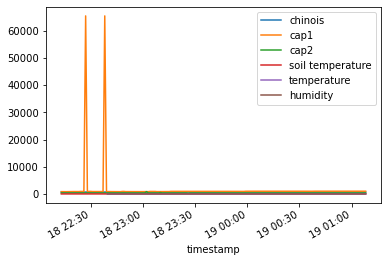

In [7]:
df.plot()